## Percepton
### Aim:  To predict if a person is diabetic or non-diabetic
### Dataset: Diabetes
### Source: kaggle: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data =pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


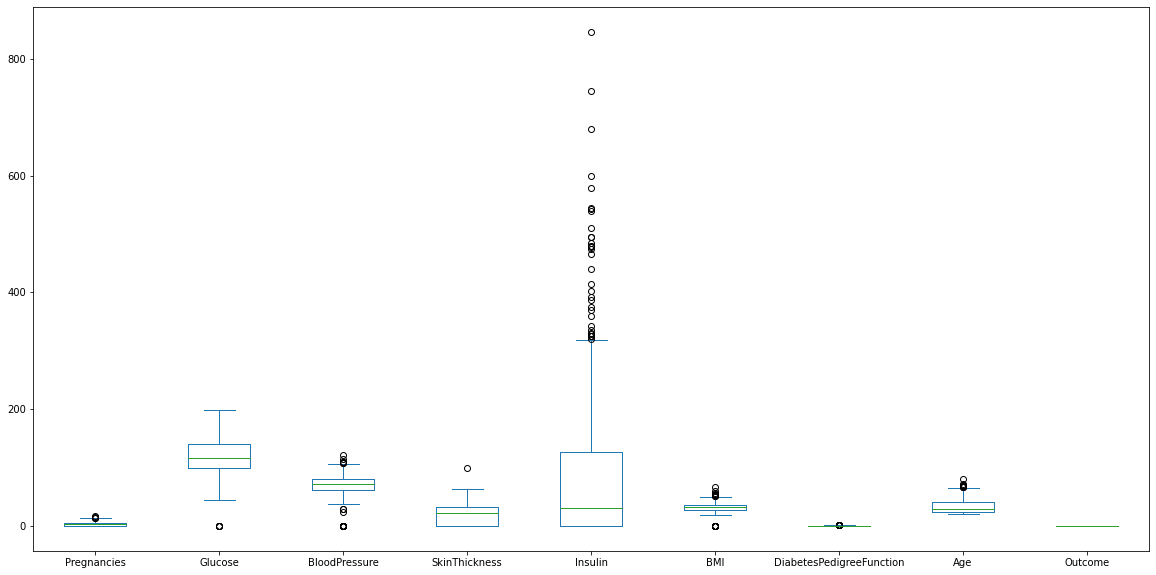

In [ ]:
data.plot(kind="box",figsize =(20,10))

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness of Insulin:  2.2678104585131753


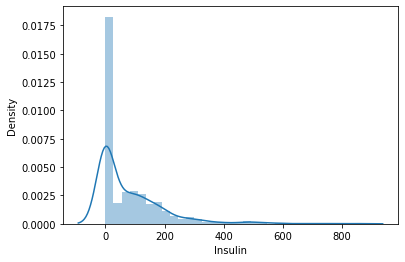

In [ ]:
# Probability Distribution of the Insulin
sns.distplot(data["Insulin"])
# The graph indicates that its a right skewed data

from scipy.stats import skew
print("Skewness of Insulin: ",skew(data["Insulin"]))

In [ ]:
P25 = data["Insulin"].quantile(0.25)
P75 = data["Insulin"].quantile(0.75)
print(P25,P75)
upper = P75 + 1.5*(P75-P25)
lower = P25 - 1.5*(P75-P25)
print(upper,lower)

0.0 127.25
318.125 -190.875


In [ ]:
# Capping
new_data = data.copy()
new_data["Insulin"]=np.where(new_data["Insulin"]>upper,upper,
                               np.where(new_data["Insulin"]<lower,lower,
                                        new_data["Insulin"]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

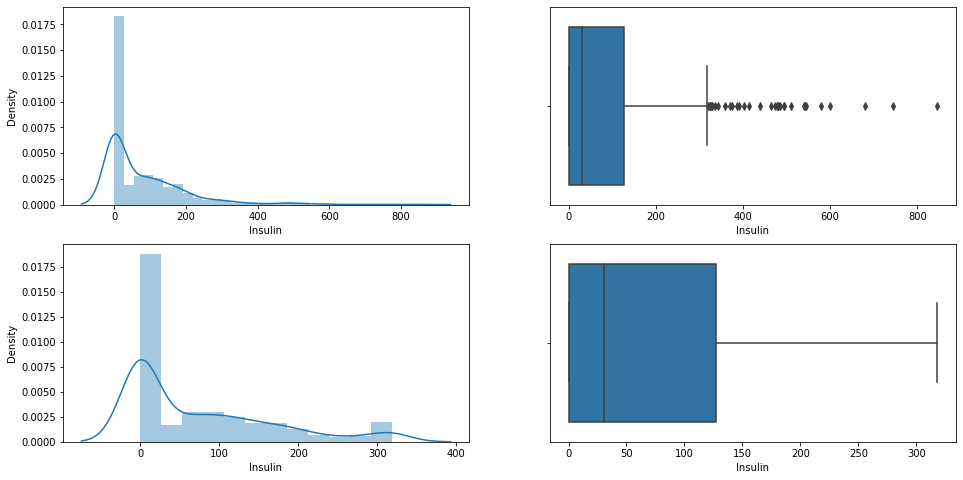

In [ ]:
# Comparing the plots before and after outlier detection
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["Insulin"])
plt.subplot(2,2,2)
sns.boxplot(data["Insulin"])
plt.subplot(2,2,3)
sns.distplot(new_data["Insulin"])
plt.subplot(2,2,4)
sns.boxplot(new_data["Insulin"])
plt.show()

In [ ]:
x= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Building a Model with Perceptron

Accuracy: 0.732
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       157
           1       0.66      0.34      0.45        74

    accuracy                           0.73       231
   macro avg       0.70      0.63      0.63       231
weighted avg       0.72      0.73      0.70       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


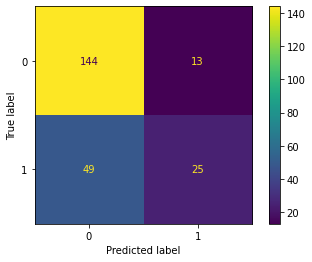

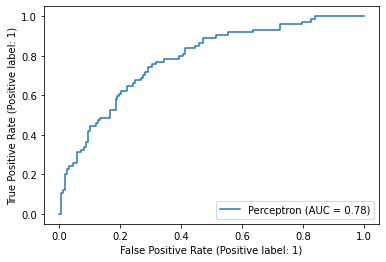

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=0 ,eta0=0.1)
model.fit(x_train,y_train)
y_pred =model.predict(x_test)
y_pred[:20]
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
plot_confusion_matrix(model, x_test, y_test)
print(classification_report(y_test, y_pred))
plot_roc_curve(model, x_test,y_test)

Accuracy: 0.779
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


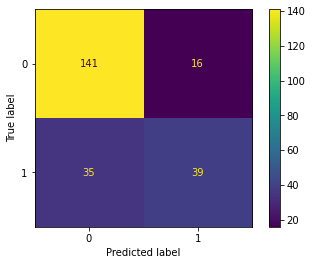

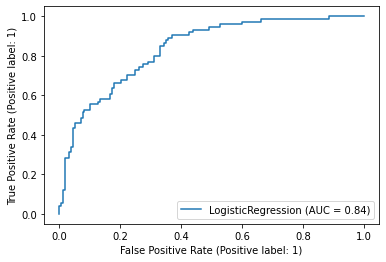

In [ ]:
from sklearn.linear_model import LogisticRegression
Reg = LogisticRegression()
Reg.fit(x_train,y_train)
y_pred = Reg.predict(x_test)
print("Accuracy: %.3f" %accuracy_score(y_test,y_pred))
plot_confusion_matrix(Reg, x_test, y_test)

print(classification_report(y_test, y_pred))
plot_roc_curve(Reg, x_test,y_test)

In the perceptron model, the obtained accuracy was 73.2% with an AUC score of 78%. By which we can say that the model is good in distinguishing the classes. In the Logistic Regression Regression model, The obtained accuracy is 77% with an AUC Score of 84%. We can thus, conclude that the Logistic Regression model, provided a better classifier than Perceptron.
